In [24]:
%matplotlib inline
#%matplotlib widget


In [25]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
from ipywidgets import HBox, Textarea, interact


In [26]:
################functions1##################################################################


In [27]:
expSumFileName = 'C:\\Users\\User\\Documents\\Eden\locate_git_code\\packaged\\botsTracking\\expSumPack.csv'
expSum = pd.read_csv(expSumFileName,index_col=0)
expNum =12
row = expSum.iloc[expNum]
file_name=row.path
suffix='_distances.csv'
PassiveLinkingFileName=row.linkingFileName
print(PassiveLinkingFileName)
PassiveLinking=pd.read_csv(PassiveLinkingFileName,index_col=0)
BotLinkingFileName=row.botLinkingFileName
print(BotLinkingFileName)
BotLinking=pd.read_csv(BotLinkingFileName,index_col=0)
PassiveFrameNum=PassiveLinking['frame.1']
BotsFrameNum=BotLinking['frame.1']
d={'frame':BotsFrameNum}
df=pd.DataFrame(data=d)


D:\Eden\17_1_23\aligners4passive28cm\C0580.MP4_locatedFull20230320_matan.csv_linked.csv
D:\Eden\17_1_23\aligners4passive28cm\C0580.MP4_botsLocatedFull20230330.csv_linked.csv


In [28]:
distances=[]
particles=[]
for framenum in PassiveFrameNum:
    relevant_passive_data=PassiveLinking[(PassiveLinking['frame.1']==framenum)]
    relevant_bots_data=BotLinking[(BotLinking['frame.1']==framenum)]
    for index in range (0,len(relevant_bots_data)):
        relevant_bot=relevant_bots_data.iloc[index]
        passive_x=relevant_passive_data.x
        passive_y=relevant_passive_data.y
        bot_x=relevant_bot.x
        bot_y=relevant_bot.y
        distance=np.sqrt(np.power((passive_x-bot_x),2)+np.power((passive_y-bot_y),2))
        distances=np.append(distances,distance)
        particle=np.array(relevant_bot.particle)
        particles=np.append(particles,particle)
    
df.insert(1,"distance",distances)
df.insert(2,"particle",particles)
df.to_csv(file_name+suffix)
df

,frame,distance,particle
frame,,,
1,1,119.104996,0.0
1,1,118.422971,1.0
1,1,118.827606,2.0
1,1,120.266371,3.0
1,1,665.546392,4.0
...,...,...,...
30683,30683,605.485755,4.0
30684,30684,611.451552,5.0
30684,30684,444.668416,3.0


In [29]:
close_threshold=130
close_times=[]
count=0
fps=25
particels_num=pd.unique(df.particle)
for particle in particels_num:
    relevant_distance=df[(df['particle']==particle)]
    for index in range(0,len(relevant_distance)):
        row=relevant_distance.iloc[index]
        if row.distance<=close_threshold:
            count=count+1
        if row.distance>close_threshold:
            row_before=relevant_distance.iloc[index-1]
            if row_before.distance<=close_threshold:
                time=float(count/fps)
                close_times.append(time)
                count=0
    if count!=0:
        time=float(count/fps)
        close_times.append(time)
        count=0
    

(array([44.,  6.,  4.,  3.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

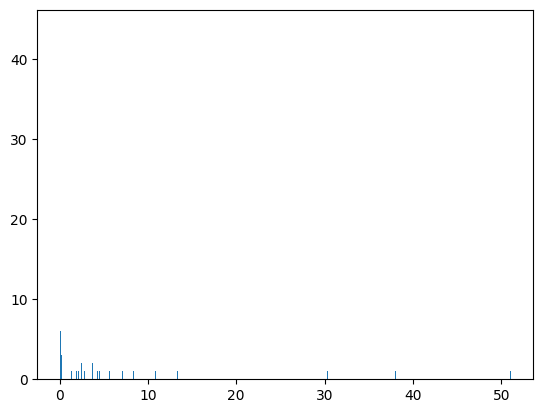

In [30]:
plt.hist(close_times,bins=1000)

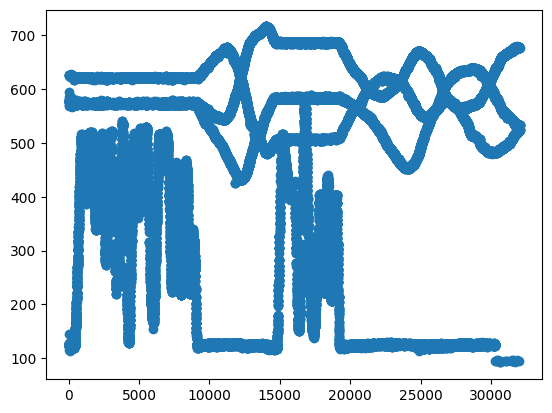

In [6]:
plt.plot(df.distance,'o')
#plt.axis([0,5000,100,700])

In [20]:
botlocatingname=row.botLocatingFileName
botlocating=pd.read_csv(botlocatingname,index_col=0)
botlocating

,frame,x,y,r
0,1.0,780.5,545.5,11.4
1,1.0,358.5,44.5,11.4
2,2.0,782.5,546.5,8.0
3,2.0,132.5,874.5,6.9
4,2.0,1042.5,83.5,6.9
...,...,...,...,...
118386,32027.0,358.5,45.5,11.4
118387,32027.0,152.5,909.5,11.4
118388,32028.0,529.5,415.5,11.4
118389,32028.0,358.5,45.5,11.4
